In [1]:
# Here, we want to go through the cropped images and find ones that can be used in the machine learning.
# Need a minimum image/ size, otherwise the images look terrible.
# Need ones that have only one polygon and have the same polygon size.
# Also, would prefer ones that have same size.

In [12]:
import numpy as np
import skimage.io as io
from os import listdir
import json
import matplotlib.pyplot as plt

In [13]:
bbox_crop_dir = '/media/greghovhannisyan/BackupData1/mscoco/images/train2017_crop_bbox/'
vertex_count_segmentation_ids_path = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/vertex_count_segmentation_ids.json'

In [23]:
# Make a dictionary of all of the images. The key is the tuple of (height, width) and the value is a list of
# segmentation ids that have that (height, width). Note that we are ignoring the channel argument, which is presumed
# to be 3.

# Create the empty dict
image_shape_dict = dict()

# Loop through every image
try:
    for filename in listdir(bbox_crop_dir):
        # Get the height and width of the image
        im_shape = io.imread(bbox_crop_dir + filename).shape
        if(len(im_shape) == 2):
            height, width = im_shape
        else:
            height, width, _ = im_shape
        # Check if the height and width are already in the dict
        if((height, width) not in image_shape_dict.keys()):
            # If not, then add the new key and give it an empty list
            image_shape_dict[(height, width)] = list()    
        # Add the segmentation id to the dictionary under the correct key    
        image_shape_dict[(height, width)].append(filename.split('.')[0])
except:
    print(filename)
    exit()

In [35]:
# make a dictinary, where the key is the size of the image and the value is a list of segmentation ids
import json
write_file_dir = '/home/greghovhannisyan/PycharmProjects/towards_rlnn_cnn/ObjectSegWithRL/data/'
write_file_name = 'bbox_crop_shape.json'

# Accidentally made all of the values string, but they should have been ints. Convert values to int
for val in image_shape_dict.keys():
    image_shape_dict[val] = list(map(int, image_shape_dict[val]))

# Convert the dict keys to a json friendly format
conv_dict = dict()
for key in image_shape_dict.keys():
    conv_dict[str(key)] = image_shape_dict[key]
    
with open(write_file_dir + write_file_name, 'w') as write_file:
    json.dump(conv_dict, write_file, indent=4)

In [77]:
# Make a new dictionary that has images of a certain size or better
gte_image_shape_dict = dict()

for key in image_shape_dict.keys():
    height, width = key
    if(height * width) >= 10000:
        gte_image_shape_dict[key] = image_shape_dict[key]

In [87]:
# Convert the dict keys to a json friendly format
conv_dict = dict()
for key in gte_image_shape_dict.keys():
    conv_dict[str(key)] = gte_image_shape_dict[key]
    
with open(write_file_dir + 'bbox_crop_shape_gte10k.json', 'w') as write_file:
    json.dump(conv_dict, write_file, indent=4)

In [81]:
len(image_shape_dict.values())

148910

In [79]:
len(gte_image_shape_dict.values())

126652

In [84]:
sum = 0
for key in gte_image_shape_dict.keys():
    sum += len(gte_image_shape_dict[key])
print(sum)

280669


In [74]:
print(len(image_shape_dict))
print(len(conv_dict))
print(len(listdir(bbox_crop_dir)))

print(len(image_shape_dict[(1, 1)]))
print(image_shape_dict[(1, 1)])
#print(image_shape_dict)

148910
148910
858662
6
[2088104, 2138639, 38004, 1637694, 1977531, 1639693]


In [53]:
def get_key_with_most_vals(in_dict):
    maxcount = max(len(v) for v in in_dict.values())
    return [k for k, v in in_dict.items() if len(v) == maxcount]

In [54]:
print(get_key_with_most_vals(image_shape_dict))

[(6, 6)]


In [64]:
sorted(list(len(v) for v in image_shape_dict.values()))[-2]

583

In [76]:
from collections import OrderedDict
ordered_d = OrderedDict(sorted(image_shape_dict.items(), key=lambda (k,v):len(v), reverse=True))

SyntaxError: invalid syntax (<ipython-input-76-8268283f3a86>, line 2)

(1, 1)

3


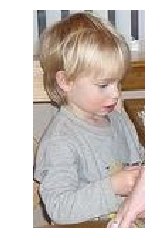

In [93]:
I = io.imread(bbox_crop_dir + '256229.jpg')
print(len(I.shape))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
# If an image is too small, then it is hard to see and understand. Hence, we try to exclude such images from 
# our training dataset. In this case, the limit is >=10,000

img_gt_10k_list = list()
for filename in listdir(bbox_crop_dir):
    if(io.imread(bbox_crop_dir + filename).size >= 10000):
        img_gt_10k_list.append(int(filename.split('.')[0]))
        #print(filename)
        #print(io.imread(bbox_crop_dir + filename).size)
    

In [ ]:
# Cross check the images found here with the 'vertex_count_segmentation_ids' file.
# Load the json, then loop through every item in it:
# Then, search every item in each list. If any of them are in the 'img_gt_10k_list', then add them to 

crop_vertex_count_dict = dict()
with open(vertex_count_segmentation_ids_path, 'r') as json_read_file:
    vertex_json = json.load(json_read_file)
    
for key in vertex_json.keys():
    for ann_item in vertex_json[key]:
        if ann_item in img_gt_10k_list:
            if key in crop_vertex_count_dict:
                crop_vertex_count_dict[key].append(ann_item)
            else:
                crop_vertex_count_dict[key] = list()
                crop_vertex_count_dict[key].append(ann_item)

In [31]:
# Now we want to see how many of the images in crop_vertex_count_dict have the same size
# So, we need to find the list with the most items in it, then form a dictionary of the file sizes of those.
print(sorted(crop_vertex_count_dict, key=crop_vertex_count_dict.get)[-1])






168


In [25]:
len(img_gt_10k_list)

10111

In [35]:
crop_vertex_count_dict['168']
for val in crop_vertex_count_dict['168']:
    print(io.imread(bbox_crop_dir + str(val) + '.jpg').size)

94860
702240
417171
143520
197820
37128
16245
24576


In [23]:
img_gt_10k_list

['1065349',
 '132492',
 '1562519',
 '1090709',
 '1706988',
 '1961000',
 '561482',
 '1623562',
 '60987',
 '176203',
 '1117491',
 '1060588',
 '2153519',
 '382496',
 '2148347',
 '2117756',
 '1277964',
 '203004',
 '579722',
 '1056519',
 '222002',
 '1533433',
 '72578',
 '1821446',
 '348914',
 '902100403064',
 '1579819',
 '2148891',
 '64824',
 '2184458',
 '1269370',
 '79544',
 '1588312',
 '701610',
 '419259',
 '1183661',
 '640744',
 '198068',
 '157490',
 '1859478',
 '1606799',
 '713148',
 '2171792',
 '1924037',
 '129630',
 '313531',
 '900100176324',
 '309746',
 '1077677',
 '1874298',
 '595616',
 '346785',
 '416869',
 '1373708',
 '528771',
 '1165958',
 '484107',
 '1428427',
 '173825',
 '908400194247',
 '574654',
 '623490',
 '461438',
 '1094105',
 '377917',
 '333392',
 '1760936',
 '1945572',
 '1578400',
 '1054981',
 '2164383',
 '485789',
 '1746128',
 '21878',
 '396496',
 '900900020104',
 '181077',
 '535204',
 '1076747',
 '2023152',
 '478176',
 '48705',
 '59932',
 '1722523',
 '2153184',
 '44462